Number of qubits in Tweedledum circuit: 11
                                                                    ╭────╮  »
__a10 : ────────────────────────────────────────────────────────────┤ rx ├──»
                                                            ╭────╮  ╰─┬──╯  »
 __a9 : ────────────────────────────────────────────────────┤ rx ├────┼─────»
                                  ╭────╮                    ╰─┬──╯    │     »
 __a8 : ──────────────────────────┤ rx ├──────────────────────┼───────◯─────»
        ╭────╮                    ╰─┬──╯                      │       │     »
 __a7 : ┤ rx ├──────────────────────┼─────────────────────────┼───────◯─────»
        ╰─┬──╯                      │                         │             »
 __q6 : ──┼─────────────────────────┼─────────────────────────┼─────────────»
          │             ╭────────╮  │   ╭────────╮            │             »
 __q5 : ──┼─────────────┤ parity ├──◯───┤ parity ├────────────┼─────────────»
          │   ╭──────

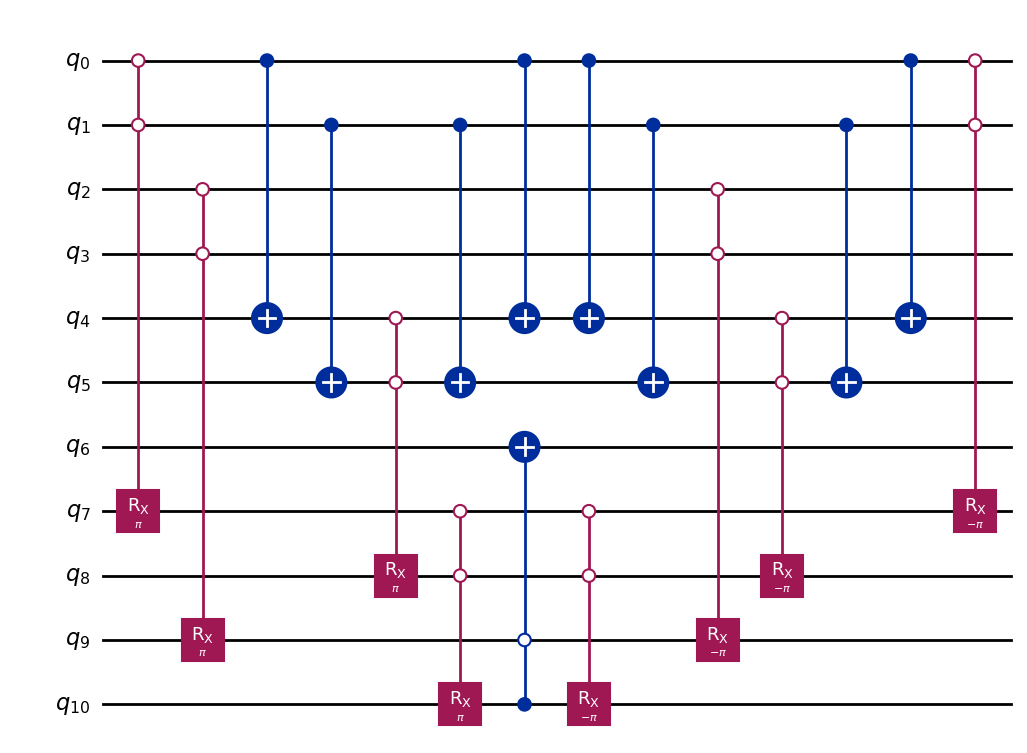

In [ ]:
from tweedledum.synthesis import xag_synth  # Import XAG synthesis
from qiskit.circuit.classicalfunction.utils import tweedledum2qiskit
from qiskit.circuit.classicalfunction import ClassicalFunction
from tweedledum.qiskit import *
from qiskit.circuit.classicalfunction.types import Int1
import inspect
from textwrap import dedent
from tweedledum.bool_function_compiler.bitvec import BitVec
from tweedledum.bool_function_compiler.bool_function import BoolFunction
from tweedledum.classical import write_verilog

def grover_oracle_func(v1: BitVec(2), v3: BitVec(2), v5: BitVec(2)) -> BitVec(1):

    c0 = (v1 != BitVec(2, value=0)) and (v1 != BitVec(2, value=1) )
    c1 = (v1 != v5)
    c2 = (v3 != BitVec(2, value=0)) and (v3 != BitVec(2, value=2))

    return (c0 and c1 and c2)

cf1 = BoolFunction(grover_oracle_func)
def xag_synthesizer(cf):
    """Custom synthesizer using XAG synthesis instead of PKRM""" 

    # Get the LogicNetwork object from cf.network
    logic_network = cf._logic_network
    
    # Perform XAG synthesis ONCE and store the result
    tweedledum_circuit = xag_synth(logic_network)
    print(f"Number of qubits in Tweedledum circuit: {tweedledum_circuit.num_qubits()}")
    print(tweedledum_circuit)
    qc_qiskit = to_qiskit(tweedledum_circuit, circuit_type="gatelist")

    return qc_qiskit
write_verilog(cf1._logic_network, "test.v")
grover_oracle = xag_synthesizer(cf1)
grover_oracle.name = "grover_oracle_func"
grover_oracle.draw('mpl')

In [40]:
grover_oracle.depth()

10